In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#dosya içindeki değerler okunur
bitcoin = pd.read_csv('dataset.csv')
bitcoin.head()

#veriler xlsx dosyası içerisinden okundu.
#head ile gösterildi.

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [56]:
bitcoin.columns #sütunları görmek için kullandık.

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [57]:
cols = ['Date','Open','High','Low','Close','Volume','Market Cap']
bitcoin.columns = cols

In [58]:
bitcoin.isnull().sum()
#NaN tipinde boşluklar olmadığından eksik yerleri göremiyoruz.

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [59]:
bitcoin.info() #date type kontrolü

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [60]:
for col in bitcoin.columns:
    print('{} : {}'.format(col,bitcoin[col].unique()))

Date : ['Jul 31, 2017' 'Jul 30, 2017' 'Jul 29, 2017' ... 'Apr 30, 2013'
 'Apr 29, 2013' 'Apr 28, 2013']
Open : [2763.24 2724.39 2807.02 ...  144.    134.44  135.3 ]
High : [2889.62 2758.53 2808.76 ...  146.93  147.49  135.98]
Low : [2720.61 2644.85 2692.8  ...  134.05  134.    132.1 ]
Close : [2875.34 2757.18 2726.45 ...  139.    144.54  134.21]
Volume : ['860,575,000' '705,943,000' '803,746,000' ... '32,505,800' '46,862,700'
 '-']
Market Cap : ['45,535,800,000' '44,890,700,000' '46,246,700,000' ... '1,597,780,000'
 '1,491,160,000' '1,500,520,000']


In [61]:
for col in bitcoin.columns:
    bitcoin[col].replace({'?':np.nan},inplace=True)
    
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [62]:
bitcoin.isnull().sum() #eğer varsa boş verileri görebiliriz artık


Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [63]:
num_col = ['Low'] #boş değeri olan kolonlar
for col in num_col:
    bitcoin[col]=pd.to_numeric(bitcoin[col])
    bitcoin[col].fillna(bitcoin[col].mean(), inplace=True) # boş değeri olanlar sütundaki sayıların ortalaması ile doldurulacak. Bu metod az kayıp olduğunda kullanılır.

bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


<AxesSubplot:>

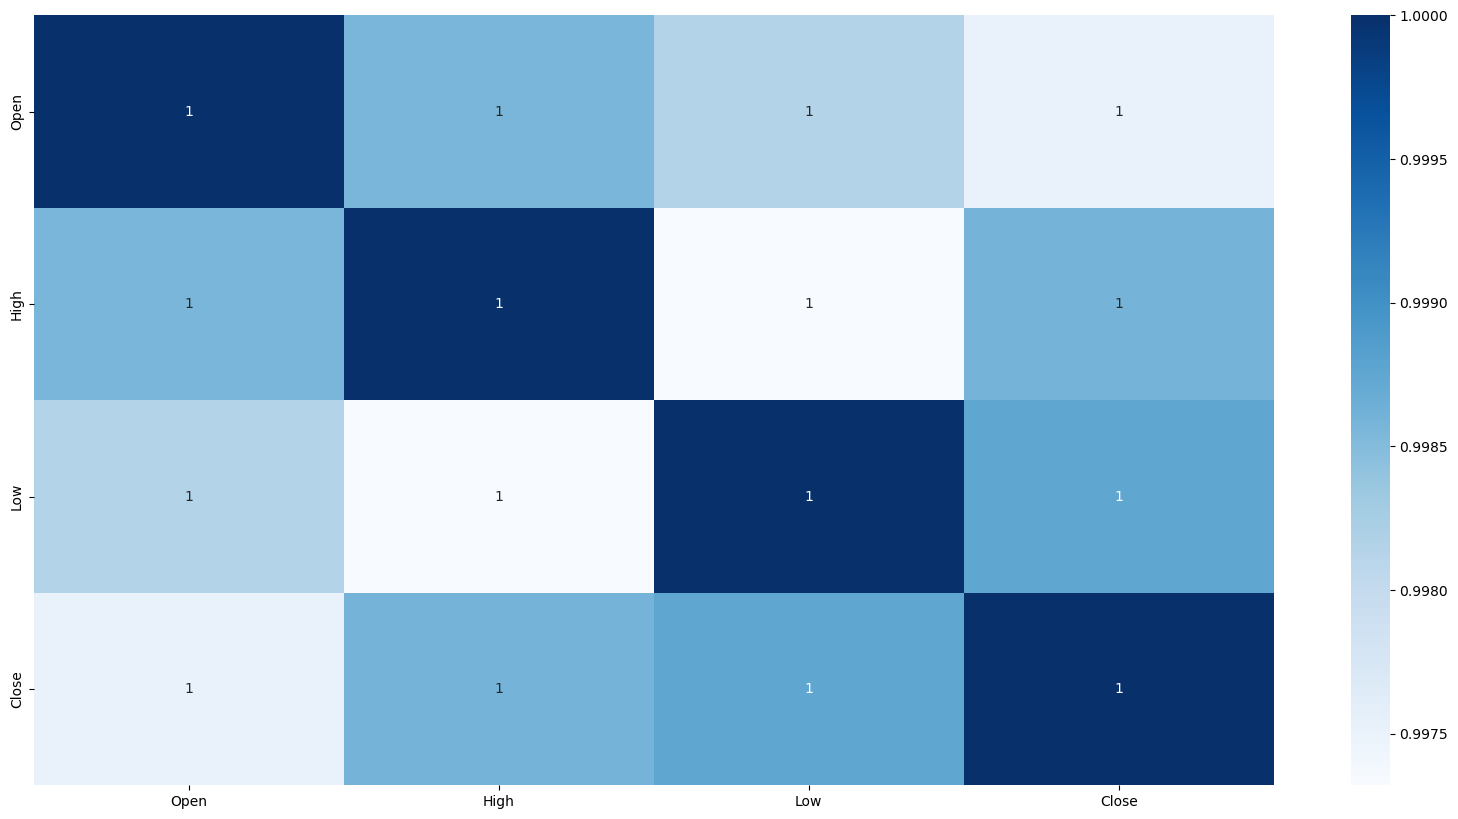

In [69]:
#ısı haritası
plt.figure(figsize=(20,10))
sns.heatmap(bitcoin.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'High')

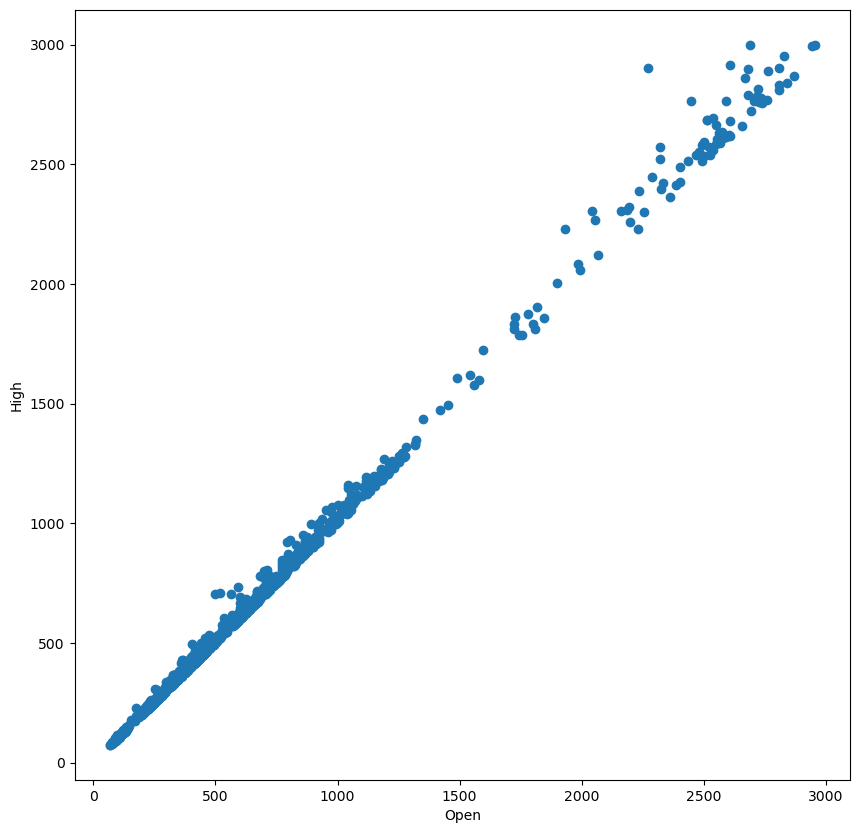

In [70]:
#mesela bitcoin'in high ve open ile beraber değişimine bakalım:
plt.figure(figsize=(10,10))
plt.scatter(x='Open',y='High',data=bitcoin)
plt.xlabel('Open')
plt.ylabel('High') #doğru orantılı bir biçimde arttığını görebiliriz.


<AxesSubplot:xlabel='Open', ylabel='Count'>

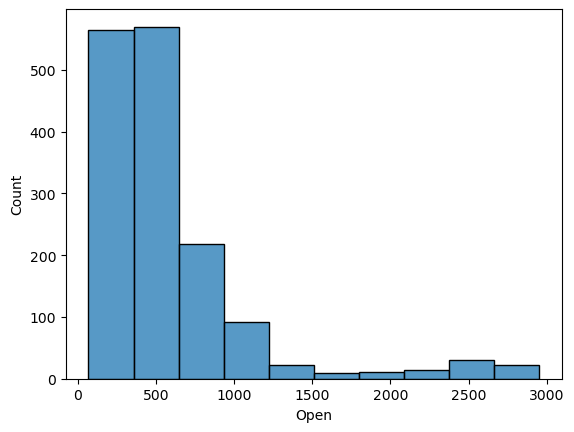

In [72]:
sns.histplot(bitcoin.Open,bins=10) #farklı bir diyagramda Open değerleri

In [73]:
bitcoin.Close.value_counts()
#sütunla alakalı değerleri görmek için

104.00    4
111.50    3
129.00    3
236.15    3
103.00    2
         ..
413.97    1
414.86    1
417.13    1
421.69    1
134.21    1
Name: Close, Length: 1529, dtype: int64

<AxesSubplot:xlabel='Low', ylabel='Close'>

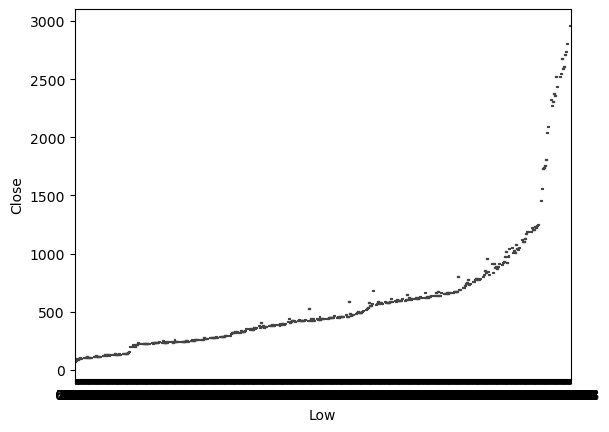

In [79]:
sns.boxplot(x='Low',y='Close',data=bitcoin) #kutu grafiğini görürüz.Kutuların ortasındaki çizgi o değerlerin ortalamsıdır.
